# Testing Data Pipeline Module

This notebook tests the complete data pipeline from `src.data`:
- Loading eBird data
- Preprocessing into species matrix
- Creating PyTorch datasets
- Creating DataLoaders

In [1]:
# Add project root to Python path
import sys
from pathlib import Path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

print(f'Project root: {project_root}')

Project root: c:\Users\Arnav\Documents\Python Scripts\bird embeddings


## 1. Test Data Loading

In [3]:
from src.data import load_ebird_data, get_ebird_columns

# Load sample data (first 50K rows for speed)
data = load_ebird_data(
    r"C:\Users\Arnav\Documents\Python Scripts\bird embeddings\ebd_IN-KL_smp_relSep-2025\ebd_IN-KL_smp_relSep-2025.txt",
    nrows=50000
)

print(f"\nData shape: {data.shape}")
print(f"Columns: {data.columns.tolist()[:10]}...")  # First 10 columns

✓ Loaded eBird data from: ebd_IN-KL_smp_relSep-2025.txt
  Rows: 50,000
  Columns: 53
  (Limited to first 50,000 rows)

Data shape: (50000, 53)
Columns: ['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER', 'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME', 'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE']...


In [4]:
# Preview the data
data.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,CHECKLIST COMMENTS,SPECIES COMMENTS,Unnamed: 52
0,URN:CornellLabOfOrnithology:EBIRD:OBS529729760,2024-04-28 17:19:40.106716,11963,species,avibase-B9538B77,Oriental Hobby,Falco severus,NaN,NaN,NaN,...,NaN,0,NaN,0,1,1,NaN,Submitted as rarity upload. Compiled by Abhina...,Observer&#61;Bourdillon--Reference&#61;http://...,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS444817753,2024-04-28 15:42:40.756927,5833,species,avibase-D348C2D6,Sociable Lapwing,Vanellus gregarius,NaN,NaN,NaN,...,NaN,0,NaN,0,1,1,NaN,Submitted as rarity upload. Compiled by Abhina...,Observer= HS Fergusson--https://www.biodiversi...,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS444815350,2024-04-28 15:42:40.756927,6265,species,avibase-236D9272,Indian Courser,Cursorius coromandelicus,NaN,NaN,NaN,...,NaN,0,NaN,0,1,1,NaN,Submitted as rarity upload. Compiled by Abhina...,Observer&#61; Museum collector--Reference&#61;...,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS444815641,2024-04-28 15:42:40.756927,6265,species,avibase-236D9272,Indian Courser,Cursorius coromandelicus,NaN,NaN,NaN,...,NaN,0,NaN,0,1,1,NaN,Submitted as rarity upload. Compiled by Abhina...,Observer&#61; Museum collector--Reference&#61;...,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS444815825,2024-04-28 15:42:40.756927,6265,species,avibase-236D9272,Indian Courser,Cursorius coromandelicus,NaN,NaN,NaN,...,NaN,0,NaN,0,1,1,NaN,Submitted as rarity upload. Compiled by Abhina...,Observer&#61; Museum collector--Reference&#61;...,NaN


In [5]:
# Check unique checklists and species
print(f"Unique checklists: {data['SAMPLING EVENT IDENTIFIER'].nunique():,}")
print(f"Unique species: {data['COMMON NAME'].nunique():,}")
print(f"\nTop 10 most common species:")
data['COMMON NAME'].value_counts().head(10)

Unique checklists: 2,982
Unique species: 549

Top 10 most common species:


COMMON NAME
Indian Pond-Heron               962
Little Egret                    774
White-cheeked Barbet            720
Little Cormorant                650
Eastern Cattle-Egret            605
Brahminy Kite                   558
Greater Racket-tailed Drongo    557
Red-whiskered Bulbul            546
White-throated Kingfisher       533
Red-wattled Lapwing             522
Name: count, dtype: int64

## 2. Test Data Preprocessing

In [6]:
from src.data import create_species_matrix

# Create basic species matrix (applies quality filters by default)
# Quality filters:
#  - CATEGORY == 'species' (excludes hybrids, unidentified)
#  - OBSERVATION TYPE in ['Traveling', 'Stationary']
#  - ALL SPECIES REPORTED == 1 (complete checklists)
matrix, species_list = create_species_matrix(data)

print(f"\nMatrix shape: {matrix.shape}")
print(f"Number of species: {len(species_list)}")
print(f"\nFirst 5 species: {species_list[:5]}")

Input data: 50,000 observations
  Unique checklists: 2,982
  Unique species: 549

Applying quality filters...
  After CATEGORY='species': 46,839 observations (3,161 removed)
  After OBSERVATION TYPE filter: 32,899 observations (13,940 removed)
  After ALL SPECIES REPORTED=1: 24,912 observations (7,987 removed)

✓ Quality filters applied: 50,000 → 24,912 observations
  Removed: 25,088 (50.2%)

Filtered data:
  Unique checklists: 1,102
  Unique species: 373

Pivoting data to create species matrix...
✓ Initial matrix: 1,102 checklists × 373 species

✓ Final matrix: 1,102 checklists × 373 species

Matrix shape: (1102, 374)
Number of species: 373

First 5 species: ['Alpine Swift', 'Ashambu Laughingthrush', 'Ashy Drongo', 'Ashy Prinia', 'Ashy Woodswallow']


In [7]:
# Preview the matrix
matrix.head()

COMMON NAME,SAMPLING EVENT IDENTIFIER,Alpine Swift,Ashambu Laughingthrush,Ashy Drongo,Ashy Prinia,Ashy Woodswallow,Ashy-crowned Sparrow-Lark,Asian Brown Flycatcher,Asian Emerald Dove,Asian Fairy-bluebird,...,Yellow-billed Babbler,Yellow-browed Bulbul,Yellow-crowned Woodpecker,Yellow-eyed Babbler,Yellow-footed Green-Pigeon,Yellow-legged Buttonquail,Yellow-throated Bulbul,Yellow-throated Sparrow,Yellow-wattled Lapwing,Zitting Cisticola
0,S101848568,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
1,S101848570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S101848571,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,S10381865,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,S10382178,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# Test filtering rare species
matrix_filtered, species_filtered = create_species_matrix(
    data,
    min_species_observations=20  # Must appear in at least 20 checklists
)

print(f"\nOriginal: {len(species_list)} species")
print(f"Filtered: {len(species_filtered)} species")
print(f"Removed: {len(species_list) - len(species_filtered)} rare species")

Input data: 50,000 observations
  Unique checklists: 2,982
  Unique species: 549

Applying quality filters...
  After CATEGORY='species': 46,839 observations (3,161 removed)
  After OBSERVATION TYPE filter: 32,899 observations (13,940 removed)
  After ALL SPECIES REPORTED=1: 24,912 observations (7,987 removed)

✓ Quality filters applied: 50,000 → 24,912 observations
  Removed: 25,088 (50.2%)

Filtered data:
  Unique checklists: 1,102
  Unique species: 373

Pivoting data to create species matrix...
✓ Initial matrix: 1,102 checklists × 373 species

Filtering species with < 20 observations...
✓ Removed 146 rare species
  Kept 227 species

✓ Final matrix: 1,102 checklists × 227 species

Original: 373 species
Filtered: 227 species
Removed: 146 rare species


In [9]:
# Test with metadata
matrix_with_meta, species_with_meta = create_species_matrix(
    data,
    min_species_observations=20,
    keep_checklist_metadata=True,
    metadata_cols=['COUNTY', 'OBSERVATION DATE', 'LATITUDE', 'LONGITUDE']
)

print(f"\nMatrix with metadata shape: {matrix_with_meta.shape}")
print(f"Columns: {matrix_with_meta.columns.tolist()[:10]}...")  # First 10

Input data: 50,000 observations
  Unique checklists: 2,982
  Unique species: 549

Applying quality filters...
  After CATEGORY='species': 46,839 observations (3,161 removed)
  After OBSERVATION TYPE filter: 32,899 observations (13,940 removed)
  After ALL SPECIES REPORTED=1: 24,912 observations (7,987 removed)

✓ Quality filters applied: 50,000 → 24,912 observations
  Removed: 25,088 (50.2%)

Filtered data:
  Unique checklists: 1,102
  Unique species: 373

Pivoting data to create species matrix...
✓ Initial matrix: 1,102 checklists × 373 species

Filtering species with < 20 observations...
✓ Removed 146 rare species
  Kept 227 species

Adding checklist metadata...
✓ Added 4 metadata columns: ['COUNTY', 'OBSERVATION DATE', 'LATITUDE', 'LONGITUDE']

✓ Final matrix: 1,102 checklists × 227 species

Matrix with metadata shape: (1102, 232)
Columns: ['SAMPLING EVENT IDENTIFIER', 'Alpine Swift', 'Ashy Drongo', 'Ashy Prinia', 'Ashy Woodswallow', 'Ashy-crowned Sparrow-Lark', 'Asian Brown Flycatc

## 3. Test Species Statistics

In [10]:
from src.data import get_species_statistics

# Get species prevalence statistics
stats = get_species_statistics(matrix_filtered)

print("Top 10 most common species:")
stats.head(10)

Top 10 most common species:


,species_name,num_checklists,prevalence
0,Indian Pond-Heron,452,0.410163
1,White-cheeked Barbet,418,0.379310
2,Greater Racket-tailed Drongo,354,0.321234
3,Little Egret,347,0.314882
4,Red-whiskered Bulbul,339,0.307623
5,White-throated Kingfisher,333,0.302178
6,Spotted Dove,306,0.277677
7,Common Myna,280,0.254083
8,Yellow-browed Bulbul,279,0.253176
9,Brahminy Kite,277,0.251361


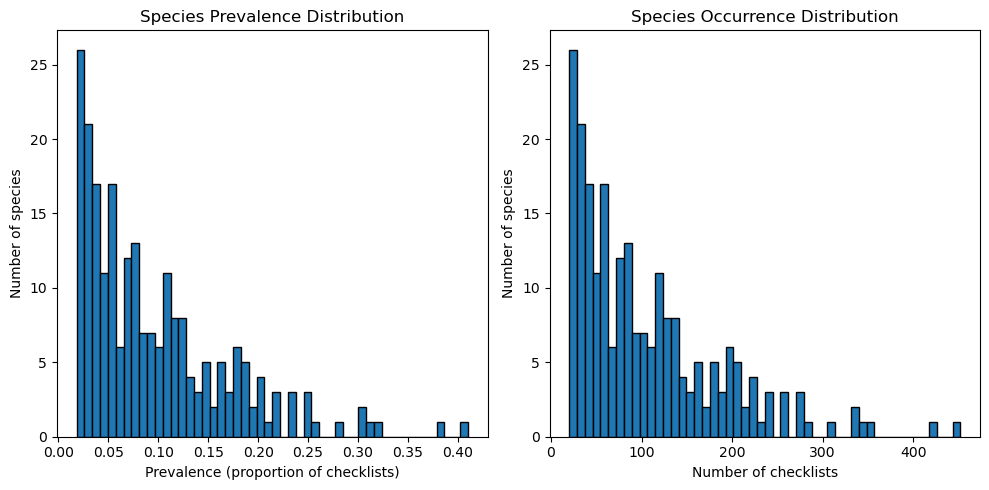


Most common species: Indian Pond-Heron
  Appears in 452 checklists (41.0%)

Rarest species: Black Bittern
  Appears in 20 checklists (1.8%)


In [11]:
# Visualize species prevalence distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(stats['prevalence'], bins=50, edgecolor='black')
plt.xlabel('Prevalence (proportion of checklists)')
plt.ylabel('Number of species')
plt.title('Species Prevalence Distribution')

plt.subplot(1, 2, 2)
plt.hist(stats['num_checklists'], bins=50, edgecolor='black')
plt.xlabel('Number of checklists')
plt.ylabel('Number of species')
plt.title('Species Occurrence Distribution')

plt.tight_layout()
plt.show()

print(f"\nMost common species: {stats.iloc[0]['species_name']}")
print(f"  Appears in {stats.iloc[0]['num_checklists']:,} checklists ({stats.iloc[0]['prevalence']:.1%})")

print(f"\nRarest species: {stats.iloc[-1]['species_name']}")
print(f"  Appears in {stats.iloc[-1]['num_checklists']:,} checklists ({stats.iloc[-1]['prevalence']:.1%})")

## 4. Test PyTorch Dataset Creation

In [12]:
from src.data import BirdChecklistDataset
import torch

# Create dataset
dataset = BirdChecklistDataset(matrix_filtered, species_filtered)

print(f"Dataset size: {len(dataset)}")
print(f"Number of species (features): {dataset.num_species}")
print(f"\nFirst checklist shape: {dataset[0].shape}")
print(f"Data type: {dataset[0].dtype}")
print(f"\nFirst checklist (first 10 species): {dataset[0][:10]}")

Dataset size: 1102
Number of species (features): 227

First checklist shape: torch.Size([227])
Data type: torch.float32

First checklist (first 10 species): tensor([0., 0., 0., 0., 0., 0., 0., 1., 1., 1.])


In [13]:
# Check data properties
print(f"Min value: {dataset.data.min()}")
print(f"Max value: {dataset.data.max()}")
print(f"Mean (species presence rate): {dataset.data.mean():.3f}")
print(f"\nAverage species per checklist: {dataset.data.sum(dim=1).mean():.1f}")

Min value: 0.0
Max value: 1.0
Mean (species presence rate): 0.096

Average species per checklist: 21.8


## 5. Test Train/Val Split

In [14]:
from src.data import split_train_val

# 80/20 train/val split with reproducible random seed
train_dataset, val_dataset = split_train_val(
    matrix_filtered,
    species_filtered,
    val_size=0.2,
    random_seed=42,
    shuffle=True
)

print(f"\nTrain dataset size: {len(train_dataset)}")
print(f"Val dataset size: {len(val_dataset)}")
print(f"Split ratio: {len(train_dataset) / len(val_dataset):.2f}")

✓ Split data: 882 train, 220 val
  Train/Val ratio: 4.01

Train dataset size: 882
Val dataset size: 220
Split ratio: 4.01


In [15]:
# Verify datasets have same number of features
print(f"Train features: {train_dataset.num_species}")
print(f"Val features: {val_dataset.num_species}")

# Check that splits are different (no overlap)
train_sample = train_dataset[0]
val_sample = val_dataset[0]
print(f"\nTrain sample sum: {train_sample.sum():.0f}")
print(f"Val sample sum: {val_sample.sum():.0f}")
print(f"Samples are different: {not torch.equal(train_sample, val_sample)}")

Train features: 227
Val features: 227

Train sample sum: 27
Val sample sum: 6
Samples are different: True


## 6. Test DataLoaders

In [16]:
from src.data import create_dataloaders

# Create DataLoaders
train_loader, val_loader = create_dataloaders(
    train_dataset,
    val_dataset,
    batch_size=64,
    num_workers=0,  # Set to 0 for Windows compatibility
    pin_memory=False
)

print(f"\nTrain batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")

✓ Created DataLoaders:
  Train: 14 batches of size 64
  Val: 4 batches of size 64

Train batches: 14
Val batches: 4


In [17]:
# Test iteration
print("Testing train loader iteration...")
for i, batch in enumerate(train_loader):
    print(f"Batch {i+1}: shape={batch.shape}, dtype={batch.dtype}, min={batch.min():.0f}, max={batch.max():.0f}")
    if i == 2:  # Just show first 3 batches
        break

print("\nTesting val loader iteration...")
for i, batch in enumerate(val_loader):
    print(f"Batch {i+1}: shape={batch.shape}, dtype={batch.dtype}, min={batch.min():.0f}, max={batch.max():.0f}")
    if i == 2:  # Just show first 3 batches
        break

Testing train loader iteration...
Batch 1: shape=torch.Size([64, 227]), dtype=torch.float32, min=0, max=1
Batch 2: shape=torch.Size([64, 227]), dtype=torch.float32, min=0, max=1
Batch 3: shape=torch.Size([64, 227]), dtype=torch.float32, min=0, max=1

Testing val loader iteration...
Batch 1: shape=torch.Size([64, 227]), dtype=torch.float32, min=0, max=1
Batch 2: shape=torch.Size([64, 227]), dtype=torch.float32, min=0, max=1
Batch 3: shape=torch.Size([64, 227]), dtype=torch.float32, min=0, max=1


In [18]:
# Verify batch properties
batch = next(iter(train_loader))

print(f"\nBatch statistics:")
print(f"  Shape: {batch.shape}")
print(f"  Data type: {batch.dtype}")
print(f"  Min: {batch.min():.2f}")
print(f"  Max: {batch.max():.2f}")
print(f"  Mean: {batch.mean():.3f}")
print(f"  Std: {batch.std():.3f}")
print(f"\n  Average species per checklist in batch: {batch.sum(dim=1).mean():.1f}")


Batch statistics:
  Shape: torch.Size([64, 227])
  Data type: torch.float32
  Min: 0.00
  Max: 1.00
  Mean: 0.099
  Std: 0.298

  Average species per checklist in batch: 22.4


## 7. Complete Pipeline Test

In [19]:
print("=" * 60)
print("COMPLETE PIPELINE TEST")
print("=" * 60)

from src.data import (
    load_ebird_data,
    create_species_matrix,
    split_train_val,
    create_dataloaders
)

# 1. Load data
print("\n1. Loading eBird data...")
data = load_ebird_data(
    r"C:\Users\Arnav\Documents\Python Scripts\bird embeddings\ebd_IN-KL_smp_relSep-2025\ebd_IN-KL_smp_relSep-2025.txt",
    nrows=100000
)

# 2. Create species matrix
print("\n2. Creating species presence-absence matrix...")
matrix, species = create_species_matrix(
    data,
    min_species_observations=30
)

# 3. Split train/val
print("\n3. Splitting into train/validation...")
train_ds, val_ds = split_train_val(
    matrix,
    species,
    val_size=0.2,
    random_seed=42
)

# 4. Create DataLoaders
print("\n4. Creating DataLoaders...")
train_loader, val_loader = create_dataloaders(
    train_ds,
    val_ds,
    batch_size=128
)

print("\n" + "=" * 60)
print("✅ PIPELINE TEST COMPLETE!")
print("=" * 60)
print(f"\nReady for training:")
print(f"  Input dimension: {train_ds.num_species}")
print(f"  Train samples: {len(train_ds):,}")
print(f"  Val samples: {len(val_ds):,}")
print(f"  Batch size: 128")
print(f"  Train batches per epoch: {len(train_loader)}")
print(f"  Val batches per epoch: {len(val_loader)}")

COMPLETE PIPELINE TEST

1. Loading eBird data...
✓ Loaded eBird data from: ebd_IN-KL_smp_relSep-2025.txt
  Rows: 100,000
  Columns: 53
  (Limited to first 100,000 rows)

2. Creating species presence-absence matrix...
Input data: 100,000 observations
  Unique checklists: 5,263
  Unique species: 578

Applying quality filters...
  After CATEGORY='species': 94,984 observations (5,016 removed)
  After OBSERVATION TYPE filter: 68,072 observations (26,912 removed)
  After ALL SPECIES REPORTED=1: 55,836 observations (12,236 removed)

✓ Quality filters applied: 100,000 → 55,836 observations
  Removed: 44,164 (44.2%)

Filtered data:
  Unique checklists: 2,246
  Unique species: 393

Pivoting data to create species matrix...
✓ Initial matrix: 2,246 checklists × 393 species

Filtering species with < 30 observations...
✓ Removed 149 rare species
  Kept 244 species

✓ Final matrix: 2,246 checklists × 244 species

3. Splitting into train/validation...
✓ Split data: 1,797 train, 449 val
  Train/Val rat

## 8. Test get_full_tensor() Utility

In [20]:
from src.data import get_full_tensor

# Get all data as single tensor (useful for inference)
all_train_data = get_full_tensor(train_ds)
all_val_data = get_full_tensor(val_ds)

print(f"Train tensor shape: {all_train_data.shape}")
print(f"Val tensor shape: {all_val_data.shape}")
print(f"\nMemory usage:")
print(f"  Train: {all_train_data.element_size() * all_train_data.nelement() / 1e6:.2f} MB")
print(f"  Val: {all_val_data.element_size() * all_val_data.nelement() / 1e6:.2f} MB")

Train tensor shape: torch.Size([1797, 244])
Val tensor shape: torch.Size([449, 244])

Memory usage:
  Train: 1.75 MB
  Val: 0.44 MB


## 9. Test EBirdPreprocessor Class (NEW!)

In [ ]:
from src.data.preprocessor import EBirdPreprocessor

print("Testing EBirdPreprocessor class...")
print("=" * 60)

# Load fresh data
print("\n1. Loading data...")
data = load_ebird_data(
    r"C:\Users\Arnav\Documents\Python Scripts\bird embeddings\ebd_IN-KL_smp_relSep-2025\ebd_IN-KL_smp_relSep-2025.txt",
    nrows=50000
)
print(f"   Loaded {len(data)} observations")

# Create preprocessor
print("\n2. Creating preprocessor...")
preprocessor = EBirdPreprocessor(
    min_species_observations=20,
    min_checklist_species=5,
    apply_quality_filters=True
)
print("   ✓ Preprocessor initialized")

# Fit and transform
print("\n3. Fitting and transforming...")
processed_matrix = preprocessor.fit_transform(data)
print(f"   ✓ Processed matrix shape: {processed_matrix.shape}")
print(f"   ✓ Number of species: {len(preprocessor.species_list_)}")
print(f"   ✓ First 5 species: {preprocessor.species_list_[:5]}")

# Verify no checklist ID column
print("\n4. Verifying output format...")
assert 'SAMPLING EVENT IDENTIFIER' not in processed_matrix.columns, "Checklist ID should be removed"
print("   ✓ Checklist ID column removed")
print("   ✓ All columns are numeric (species presence/absence)")

# Test transform on new data
print("\n5. Testing transform on new data...")
new_data = load_ebird_data(
    r"C:\Users\Arnav\Documents\Python Scripts\bird embeddings\ebd_IN-KL_smp_relSep-2025\ebd_IN-KL_smp_relSep-2025.txt",
    nrows=10000
)
new_matrix = preprocessor.transform(new_data)
print(f"   ✓ New matrix shape: {new_matrix.shape}")
print(f"   ✓ Same number of features: {new_matrix.shape[1] == processed_matrix.shape[1]}")

print("\n" + "=" * 60)
print("✅ EBirdPreprocessor class works correctly!")
print("=" * 60)

## Summary

If all cells above ran successfully, the data pipeline module is working correctly! ✅

You can now use this pipeline to:
1. Load eBird data from TSV files
2. Convert to species presence-absence matrices
3. Create train/val datasets
4. Create DataLoaders for training VAE models
5. **NEW:** Use EBirdPreprocessor class for easier preprocessing workflows